## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문 과정

#### 교과목명: 딥러닝알고리즘 구현
- 평가일: 04-22
- 성명: 박광민
- 점수: 100

Q1. 사람이 문장을 읽는 것처럼 이전에 나온 것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리하여 문장에 있은 의미를 자연스럽게 표현하려는 목적으로 과거 정보를 사용하고 새롭게 얻은 정보를 계속 업데이트하는 방식이 순환 신경망(RNN) 이다. SimpleRNN을 활용하여 IMDB 영화 리뷰 데이터에 대하여 아래 사항을 수행하세요.
- 데이터 전처리 : max_features 10000, maxlen = 500, batch_size 32
- 케라스를 사용하여 입력 시퀀스에 대한 마지막 출력만 반환하는 방식으로 모델링.(embedding 층 입력 (max_features, 32))
- 학습 및 검증 옵션 : epochs 10, batch_size 128, 검증 데이터 20%
※ 학습시간 20분
- 훈련과 검증의 손실과 정확도를 그래프로 표현
- 검증 정확도를 확인하고 동 사례에 SimpleRNN 모델의 적합 여부 및 개선 방안에 대하여 기술하세요.

In [19]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  
maxlen = 500  
batch_size = 32
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
 
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 53s 334ms/step - loss: 0.6032 - acc: 0.6679 - val_loss: 0.4666 - val_acc: 0.7930
Epoch 2/10
157/157 [==============================] - 54s 343ms/step - loss: 0.3658 - acc: 0.8476 - val_loss: 0.3475 - val_acc: 0.8550
Epoch 3/10
157/157 [==============================] - 57s 363ms/step - loss: 0.2917 - acc: 0.8851 - val_loss: 0.4232 - val_acc: 0.8302
Epoch 4/10
157/157 [==============================] - 52s 334ms/step - loss: 0.2088 - acc: 0.9211 - val_loss: 0.3672 - val_acc: 0.8432
Epoch 5/10
157/157 [==============================] - 58s 370ms/step - loss: 0.1612 - acc: 0.9405 - val_loss: 0.4001 - val_acc: 0.8394
Epoch 6/10
157/157 [==============================] - 52s 329ms/step - loss: 0.1141 - acc: 0.9603 - val_loss: 0.3956 - val_acc: 0.8552
Epoch 7/10
157/157 [==============================] - 54s 342ms/step - loss: 0.0775 - acc: 0.9755 - val_loss: 0.5266 - val_acc: 0.8028
Epoch 8/10
157/157 [==============================] - 5

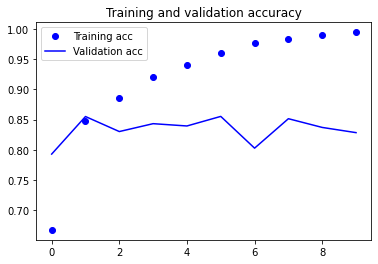

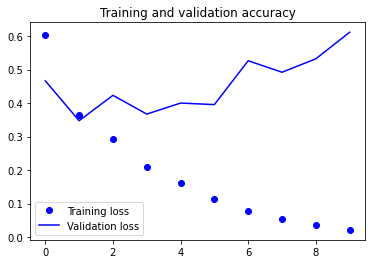

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
# - 검증 정확도는 86%
# - 전체 시퀀스가 아니라 순서대로 500개의 단어만 사용함. 
# - SimpleRNN은 긴 시퀀스의 데이터를 처리에 적합하지 않음.
# - 과거 정보까지 반영할 수 있는 다른 순환신경망을 사용한다.

Q2. Q1 문제를 LSTM 모델을 적용하여 수행하세요
- 모델링, 학습 및 검증
- 결과 시각화

In [80]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 6s 26ms/step - loss: 0.5104 - acc: 0.7570 - val_loss: 0.3852 - val_acc: 0.8446
Epoch 2/10
157/157 [==============================] - 4s 23ms/step - loss: 0.2864 - acc: 0.8899 - val_loss: 0.3029 - val_acc: 0.8832
Epoch 3/10
157/157 [==============================] - 4s 23ms/step - loss: 0.2263 - acc: 0.9128 - val_loss: 0.2914 - val_acc: 0.8798
Epoch 4/10
157/157 [==============================] - 4s 23ms/step - loss: 0.1957 - acc: 0.9283 - val_loss: 0.2877 - val_acc: 0.8922
Epoch 5/10
157/157 [==============================] - 4s 23ms/step - loss: 0.1743 - acc: 0.9358 - val_loss: 0.3416 - val_acc: 0.8494
Epoch 6/10
157/157 [==============================] - 4s 23ms/step - loss: 0.1530 - acc: 0.9461 - val_loss: 0.3226 - val_acc: 0.8774
Epoch 7/10
157/157 [==============================] - 4s 23ms/step - loss: 0.1395 - acc: 0.9507 - val_loss: 0.3231 - val_acc: 0.8858
Epoch 8/10
157/157 [==============================] - 4s 23ms/step - 

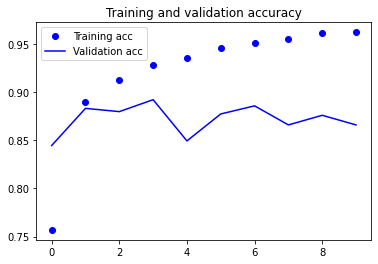

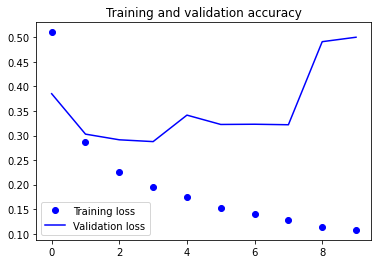

In [81]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

Q3. MNIST 숫자 이미지 데이터에 대하여 CNN 모델을 사용하여 아래사항을 수행하세요
- Conv2D와 MaxPooling2D 층을 사용하여 컨브넷을 생성(채널의 수 32개 또는 64개)
- 출력 텐서를 완전 연결 네트워크에 주입
- 10개의 클래스 분류하기 위한 분류기 추가
- 컨브넷 학습 및 평가

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.0122 - acc: 0.9965 - val_loss: 0.0281 - val_acc: 0.9935
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0110 - acc: 0.9965 - val_loss: 0.0346 - val_acc: 0.9923
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0086 - acc: 0.9972 - val_loss: 0.0358 - val_acc: 0.9927
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0085 - acc: 0.9972 - val_loss: 0.0437 - val_acc: 0.9918
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0068 - acc: 0.9980 - val_loss: 0.0472 - val_acc: 0.9910
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0063 - acc: 0.9981 - val_loss: 0.0530 - val_acc: 0.9909
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0058 - acc: 0.9980 - val_loss: 0.0653 - val_acc: 0.9902
Epoch 8/10
750/750 [==============================] - 3s 4ms/step - loss: 0.

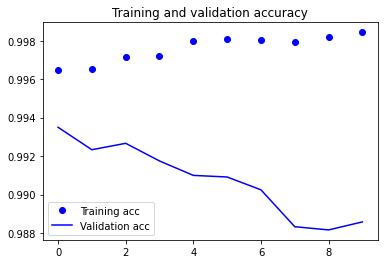

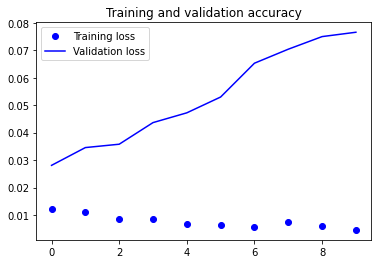

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

Q4. cats_and_dogs_small으로 축소한 데이터 셋으로 사전 훈련된 네트워크를 사용하여 강아지 고양이 분류 과제를 아래와 같이 수행하세요.
- ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반 층을 사용하여 유용한 특성 추출하고 이 특성으로 분류기 훈련
- ImageDataGenerator 사용 (※ 소요시간 20분)
- VGG 매개변수
 - weights는 모델을 초기화할 가중치 체크포인트를 지정 : 'imagenet'
 - include_top은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정 : False
 - input_shape은 네트워크에 주입할 이미지 텐서의 크기 :(150.150,3)
- 데이터 증식을 사용하지 않는 방법으로 수행
- 완전 연결 분류기를 정의하고 규제를 위해 드롭아웃 사용 : 0.5

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
train_dir = '/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs_small/train'

validation_dir = '/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs_small/train'

test_dir = '/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs_small/train'

In [71]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))


In [59]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size = batch_size,
        class_mode='binary'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count : 
            break
    return features,labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4 * 4* 512))
test_features = np.reshape(test_features, (1000, 4*4*512))
 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [60]:
from tensorflow.keras import optimizers

model = Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5),loss = 'binary_crossentropy',metrics = ['acc'])

history = model.fit(train_features, train_labels,epochs = 30,batch_size = 20,validation_data = (validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.5908 - acc: 0.6745 - val_loss: 0.4222 - val_acc: 0.8330
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4177 - acc: 0.8180 - val_loss: 0.3609 - val_acc: 0.8510
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3460 - acc: 0.8575 - val_loss: 0.3182 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3106 - acc: 0.8640 - val_loss: 0.2964 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2755 - acc: 0.8910 - val_loss: 0.2829 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2609 - acc: 0.8970 - val_loss: 0.2708 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2456 - acc: 0.9035 - val_loss: 0.2694 - val_acc: 0.8890
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.

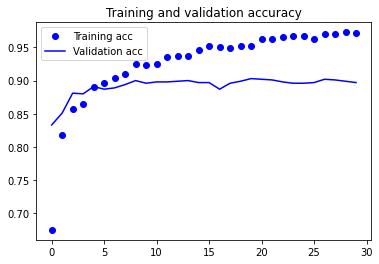

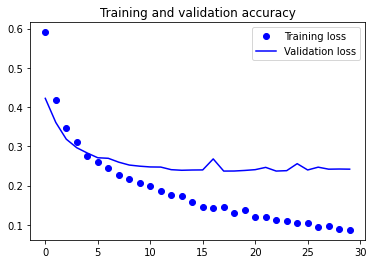

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

Q5. Q4 문제를 데이터 증식을 사용한 방식으로 수행하세요.

In [72]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [73]:
print(len(model.trainable_weights))
conv_base.trainable=False
print(len(model.trainable_weights))

30
4


In [74]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 20s 192ms/step - loss: 0.5514 - acc: 0.7375 - val_loss: 0.4142 - val_acc: 0.8440
Epoch 2/30
100/100 [==============================] - 19s 193ms/step - loss: 0.4158 - acc: 0.8320 - val_loss: 0.3364 - val_acc: 0.8710
Epoch 3/30
100/100 [==============================] - 19s 189ms/step - loss: 0.3527 - acc: 0.8580 - val_loss: 0.3039 - val_acc: 0.8800
Epoch 4/30
100/100 [==============================] - 19s 190ms/step - loss: 0.3215 - acc: 0.8655 - val_loss: 0.2843 - val_acc: 0.8950
Epoch 5/30
100/100 [==============================] - 19s 191ms/step - loss: 0.3065 - acc: 0.8760 - val_loss: 0.2764 - val_acc: 0.8900
Epoch 6/30
100/100 [==============================] - 19s 188ms/step - loss: 0.2884 - acc: 0.8810 - val_loss: 0.2776 - val_acc: 0.8890
Epoch 7/30
100/100 [==============================] - 19s 189ms/step - loss: 0.2759 - acc: 0.8850 - val_lo

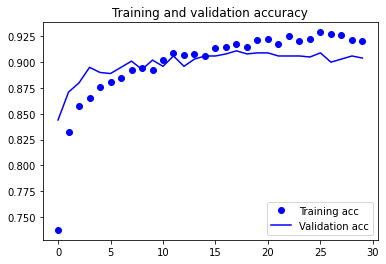

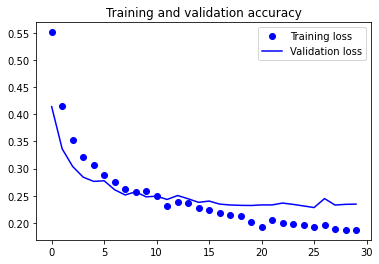

In [75]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()